# MACHINE LEARNING ASSIGNMENT - 3

In [3]:
import pandas as pd
from numpy import array
from collections import Counter
from sklearn.datasets import make_classification


In [4]:
import matplotlib.pyplot as plt
from numpy import where

In [5]:
import imblearn

In [6]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statistics as s

In [7]:
#clean up a bit
df2 = pd.read_csv('2021VAERSSYMPTOMS.csv')
df2=df2[['VAERS_ID','SYMPTOM1']]
df2=pd.get_dummies(df2, columns=['SYMPTOM1']).groupby(['VAERS_ID'], as_index=False).sum()

In [8]:
#load the data
df1=pd.read_csv('vacdeath.csv')

In [9]:
df1.columns

Index(['VAERS_ID', 'RECVDATE', 'AGE_YRS', 'CAGE_MO', 'RPT_DATE',
       'SYMPTOM_TEXT', 'DATEDIED', 'HOSPDAYS', 'VAX_DATE', 'ONSET_DATE',
       ...
       'SPLTTYPE_VFC # 21109', 'SPLTTYPE_VSAFE', 'SPLTTYPE_access through PCP',
       'SPLTTYPE_pandemic/state', 'BIRTH_DEFECT_N', 'BIRTH_DEFECT_Y',
       'OFC_VISIT_N', 'OFC_VISIT_Y', 'ER_ED_VISIT_N', 'ER_ED_VISIT_Y'],
      dtype='object', length=203)

In [10]:
#concat all
dfb=pd.merge(df1[['VAERS_ID','AGE_YRS']],df2,on='VAERS_ID')

In [11]:
#Dropping irrevalant columns 
dfc=dfb.drop(columns=['SYMPTOM1_Autopsy','SYMPTOM1_Unresponsive to stimuli','SYMPTOM1_Completed suicide','SYMPTOM1_Respiratory arrest','SYMPTOM1_Sudden death','SYMPTOM1_Endotracheal intubation complication','SYMPTOM1_Blood urea increased','SYMPTOM1_Resuscitation',
                   'SYMPTOM1_Food refusal','SYMPTOM1_Orthostatic hypotension','SYMPTOM1_Airway secretion clearance therapy','SYMPTOM1_Respiratory failure' ])


In [12]:
#slellect the preliminary features
X=dfc.select_dtypes(['number'])


In [13]:
#Create a dummy for death
y=list(df1['DATEDIED'])
set(y)


{'01/01/2021',
 '01/02/2021',
 '01/03/2021',
 '01/04/2021',
 '01/05/2021',
 '01/06/2021',
 '01/07/2021',
 '01/08/2001',
 '01/08/2021',
 '01/09/2021',
 '01/10/2021',
 '01/11/2021',
 '01/12/2021',
 '01/13/2021',
 '01/14/2021',
 '01/15/2021',
 '01/16/2021',
 '01/17/2021',
 '01/18/2021',
 '01/19/2021',
 '01/20/2021',
 '01/21/2021',
 '01/22/2021',
 '01/23/2021',
 '01/24/2021',
 '01/25/2021',
 '01/26/2021',
 '01/27/2021',
 '01/28/2021',
 '01/29/2021',
 '01/30/2021',
 '01/31/2021',
 '02/01/2021',
 '02/02/2019',
 '02/02/2021',
 '02/03/2021',
 '02/04/2021',
 '02/05/2021',
 '02/06/2021',
 '02/07/2019',
 '02/07/2021',
 '02/08/2021',
 '02/09/2021',
 '02/10/2021',
 '02/11/2021',
 '02/12/2021',
 '02/13/2021',
 '02/14/2021',
 '02/15/2021',
 '02/16/2021',
 '02/17/2021',
 '02/18/2021',
 '06/07/2016',
 '07/28/2018',
 '10/09/2019',
 '10/10/2020',
 '10/18/2020',
 '10/27/2020',
 '11/13/2020',
 '12/01/2020',
 '12/10/2020',
 '12/13/2020',
 '12/20/2020',
 '12/21/2020',
 '12/22/2020',
 '12/23/2020',
 '12/25/20

In [14]:
for i in range(len(y)):
    if y[i]=='No registered date':
        y[i]=0
    else:
        y[i]=1

In [15]:
#very unblanaced target - death 
Counter(y)

Counter({0: 8383, 1: 903})

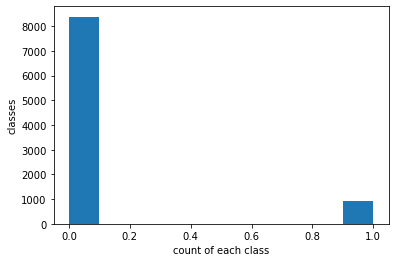

In [16]:

#Visualize Class Counts of the test 
plt.hist(y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [17]:
#SMOTE (to deal with data size)
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42
                                                    ,stratify=y)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train) 
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y)
os_data_y.columns=['y']
Counter(os_data_y.y)

Counter({0: 5868, 1: 5868})

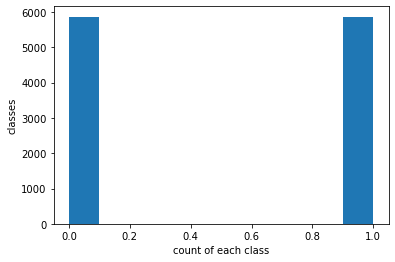

In [18]:
#Visualize Class Counts of the test 
plt.hist(os_data_y.y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [19]:
#remove redundant features
#fin_x=os_data_X.iloc[:,rfe.support_].drop(columns=['SYMPTOM1_Death','DIED_N', 'DIED_Y'])
fin_x=os_data_X.drop(columns=['SYMPTOM1_Death','VAERS_ID'])
kk=fin_x.columns
#fin_x.to_csv('safy.csv')
#load fin_x 
#fin_x=pd.read_csv('safy.csv').drop(columns='Unnamed: 0')


In [20]:
#log reg
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [21]:
#Step1: Make an instance of the model(using the default parameters)-> not sure if I need this
result = LogisticRegression(random_state = 20)


In [22]:
#log reg function
result.fit(fin_x,os_data_y)
#extract the weights for ach variable
jj=pd.DataFrame( np.round(result.coef_,5) ).transpose()
weights=pd.concat([pd.DataFrame(fin_x.columns),jj],axis=1)
weights.columns=['variable','w']


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Sorting the weights by descending order 
weights.sort_values(by=['w'],ascending=False).nlargest(10, 'w')

,variable,w
725,SYMPTOM1_Frequent bowel movements,0.45376
1002,SYMPTOM1_Lung disorder,0.45376
502,SYMPTOM1_Computerised tomogram spine,0.43089
149,SYMPTOM1_Appetite disorder,0.41324
3,SYMPTOM1_Abdominal X-ray,0.40635
774,SYMPTOM1_Haematocrit decreased,0.37018
1222,SYMPTOM1_Peritoneal lavage,0.36710
1588,SYMPTOM1_White blood cell count decreased,0.36710
1218,SYMPTOM1_Peripheral coldness,0.35161
957,SYMPTOM1_Joint injury,0.33212


In [24]:
#GLM binomial log reg
#logit_model=sm.GLM(os_data_y,fin_x, family = sm.families.Binomial())
#result=logit_model.fit()


In [25]:
#predict 
y_train_pred = result.predict(fin_x)
#y_train_pred = y_train_pred.values.reshape(-1)

In [26]:
#table with data and predictions
y_train_pred_final = pd.DataFrame({'Converted':array(os_data_y).reshape(-1), 'Conversion_Prob':y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [27]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)


[[5321  547]
 [ 326 5542]]


Text(0.5, 15.0, 'Predicted Outcome')

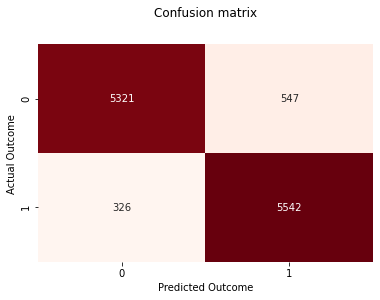

In [28]:
import seaborn as sn
sn.heatmap(metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted), annot=True, fmt='d', cmap="Reds", cbar=False);
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')


<AxesSubplot:>

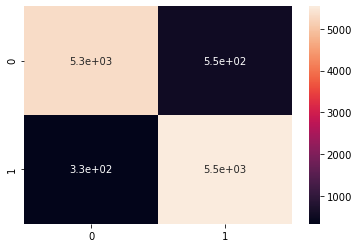

In [29]:
import seaborn as sn
sn.heatmap(confusion, annot=True)


In [30]:
#Train model accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.9256134969325154


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))


              precision    recall  f1-score   support

           0       0.94      0.91      0.92      5868
           1       0.91      0.94      0.93      5868

    accuracy                           0.93     11736
   macro avg       0.93      0.93      0.93     11736
weighted avg       0.93      0.93      0.93     11736



In [32]:
####test
y_test_pred = pd.DataFrame(result.predict(X_test[fin_x.columns]))
y_test_df = pd.DataFrame(y_test)


In [33]:
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [34]:
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)


In [35]:
#test set accuracy 
print(metrics.accuracy_score(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1]))


0.8675520459440057


Text(0.5, 15.0, 'Predicted Outcome')

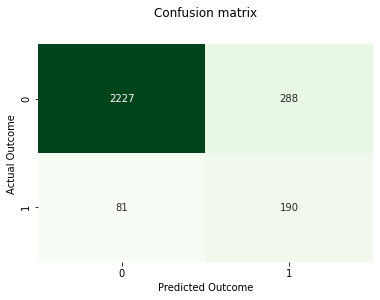

In [36]:
#Test set confusion matrix
sn.heatmap(metrics.confusion_matrix(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1]), annot=True, fmt='d', cmap="Greens", cbar=False);
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')


<AxesSubplot:>

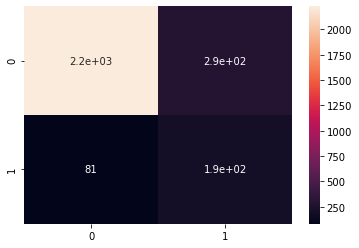

In [280]:
#test confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1] )
confusion2
sn.heatmap(confusion2, annot=True)


In [281]:
confusion2

array([[2227,  288],
       [  81,  190]], dtype=int64)

In [282]:
#get full report
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1]))


              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2515
           1       0.40      0.70      0.51       271

    accuracy                           0.87      2786
   macro avg       0.68      0.79      0.72      2786
weighted avg       0.91      0.87      0.88      2786



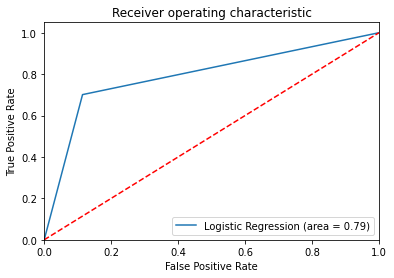

In [283]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1])
fpr, tpr, thresholds = roc_curve(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In [284]:
from sklearn import metrics
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_pred_final.iloc[:,0], y_pred_final.iloc[:,1]))

***RESULTS ON TRAIN SET***
f1_score:  0.9269883750104542
--
***RESULTS ON TEST SET***
f1_score:  0.507343124165554
